In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (GlobalAveragePooling2D, Dense, Dropout)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

"paths"
train_dir = r"C:\Users\mahes\OneDrive\Desktop\new dataset\DATASET\train"
test_dir = r"C:\Users\mahes\OneDrive\Desktop\new dataset\DATASET\test"

image_size = (48, 48)
num_classes = 7

"loadning data"
def load_data(data_dir):
    images, labels = [], []
    for label in os.listdir(data_dir):
        label_dir = os.path.join(data_dir, label)
        if not os.path.isdir(label_dir):
            continue
        for image_name in os.listdir(label_dir):
            image_path = os.path.join(label_dir, image_name)
            image = cv2.imread(image_path, cv2.IMREAD_COLOR)
            if image is not None:
                image = cv2.resize(image, image_size)
                images.append(image)
                labels.append(label)
    return np.array(images), np.array(labels)

"train and test data"
X_train, y_train = load_data(train_dir)
X_test, y_test = load_data(test_dir)


X_train = X_train / 255.0
X_test = X_test / 255.0

"encode labels"
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

"converting labels to onehot encoding"
y_train_onehot = to_categorical(y_train_encoded, num_classes=num_classes)
y_test_onehot = to_categorical(y_test_encoded, num_classes=num_classes)

"spliting data into train and testing "
X_train, X_val, y_train_onehot, y_val_onehot = train_test_split(
    X_train, y_train_onehot, test_size=0.2, random_state=42
)

'data agumentaion'
data_gen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

"vgg16 model"
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))

"buliding a model"
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

"compiling the model"
model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

"call backs"
lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6)
early_stopper = EarlyStopping(monitor='accuracy', patience=3, restore_best_weights=True)

"train the model"
history = model.fit(
    data_gen.flow(X_train, y_train_onehot, batch_size=32),
    validation_data=(X_val, y_val_onehot),
    epochs=300,
    callbacks=[lr_reducer, early_stopper]
)  

"evaluate the model "
val_loss, val_accuracy = model.evaluate(X_val, y_val_onehot)
test_loss, test_accuracy = model.evaluate(X_test, y_test_onehot)

"predcting on test data "
y_test_pred_onehot = model.predict(X_test)
y_test_pred = np.argmax(y_test_pred_onehot, axis=1)
y_test_actual = np.argmax(y_test_onehot, axis=1)

"calclate accuracy"
overall_accuracy = accuracy_score(y_test_actual, y_test_pred)

"classfication report "
report = classification_report(y_test_actual, y_test_pred, target_names=label_encoder.classes_)
print("Classification Report:\n")
print(report)

"confusion matrix"
conf_matrix = confusion_matrix(y_test_actual, y_test_pred)
print("Confusion Matrix:\n")
print(conf_matrix)

"per class accuracy"
class_accuracies = conf_matrix.diagonal() / conf_matrix.sum(axis=1)
print("\nPer-Class Accuracy:")
for label, acc in zip(label_encoder.classes_, class_accuracies):
    print(f"{label}: {acc:.4f}")

"overall test accuracy"
print(f"\nOverall Test Accuracy: {overall_accuracy:.4f}")


Epoch 1/300


c:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


374/374 ━━━━━━━━━━━━━━━━━━━━ 354s 937ms/step - accuracy: 0.3015 - loss: 1.8201 - val_accuracy: 0.4276 - val_loss: 1.4431 - learning_rate: 1.0000e-04
Epoch 2/300
374/374 ━━━━━━━━━━━━━━━━━━━━ 345s 922ms/step - accuracy: 0.4735 - loss: 1.3905 - val_accuracy: 0.5731 - val_loss: 1.1856 - learning_rate: 1.0000e-04
Epoch 3/300
374/374 ━━━━━━━━━━━━━━━━━━━━ 325s 868ms/step - accuracy: 0.5603 - loss: 1.1885 - val_accuracy: 0.6302 - val_loss: 1.0029 - learning_rate: 1.0000e-04
Epoch 4/300
374/374 ━━━━━━━━━━━━━━━━━━━━ 310s 829ms/step - accuracy: 0.6307 - loss: 1.0422 - val_accuracy: 0.6596 - val_loss: 0.9384 - learning_rate: 1.0000e-04
Epoch 5/300
374/374 ━━━━━━━━━━━━━━━━━━━━ 308s 823ms/step - accuracy: 0.6596 - loss: 0.9350 - val_accuracy: 0.6757 - val_loss: 0.8493 - learning_rate: 1.0000e-04
Epoch 6/300
374/374 ━━━━━━━━━━━━━━━━━━━━ 303s 809ms/step - accuracy: 0.6908 - loss: 0.8522 - val_accuracy: 0.6927 - val_loss: 0.8368 - learning_rate: 1.0000e-04
Epoch 7/300
374/374 ━━━━━━━━━━━━━━━━━━━━ 301s 

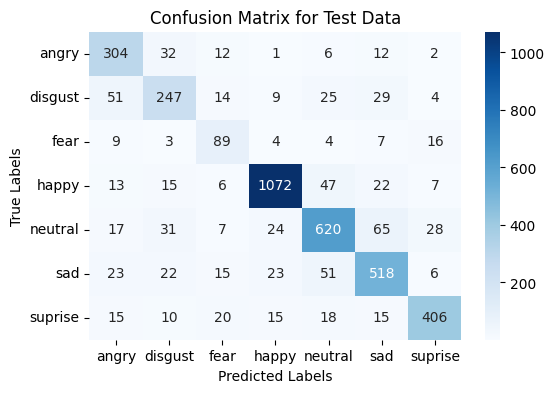

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt


def plot_confusion_matrix(conf_matrix, class_names, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title(title)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()


plot_confusion_matrix(conf_matrix, label_encoder.classes_, "Confusion Matrix for Test Data")


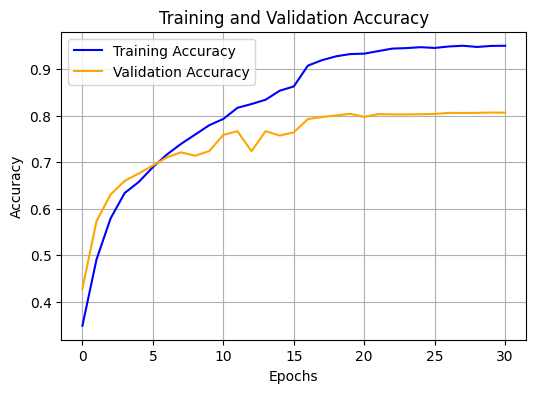

In [3]:
def plot_accuracy(history):
    plt.figure(figsize=(6, 4))
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

plot_accuracy(history)


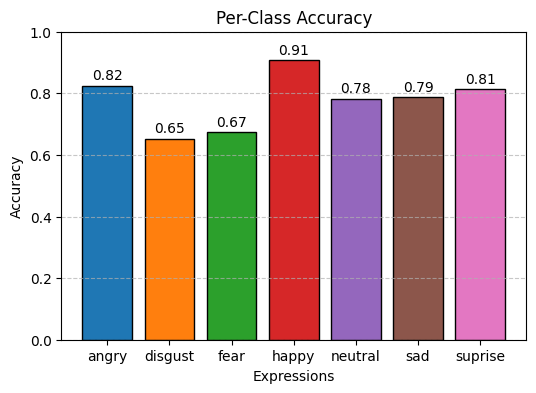

In [4]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def plot_per_class_accuracy_with_colors(classes, accuracies):
    colors = cm.tab10(range(len(classes))) 
    plt.figure(figsize=(6, 4))
    bars = plt.bar(classes, accuracies, color=colors, edgecolor='black')
    plt.xlabel('Expressions')
    plt.ylabel('Accuracy')
    plt.title('Per-Class Accuracy')
    plt.ylim(0, 1)  


    for bar, acc in zip(bars, accuracies):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, 
                 f"{acc:.2f}", ha='center', fontsize=10)
    
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


plot_per_class_accuracy_with_colors(label_encoder.classes_, class_accuracies)


In [5]:
model.save(r"C:\Users\mahes\OneDrive\Desktop\new dataset\emotion_model.h5")

In [7]:
from tensorflow.keras.models import load_model

model_path = r"C:\Users\mahes\OneDrive\Desktop\new dataset\emotion_model.h5"
try:
    model = load_model(model_path)
    print("Model loaded successfully!")
except OSError as e:
    print(f"Error loading model: {e}")


Model loaded successfully!


In [8]:
from sklearn.preprocessing import LabelEncoder


class_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'suprise']  


label_encoder = LabelEncoder()
label_encoder.fit(class_labels)  

LabelEncoder()

In [2]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder

model_path = r"C:\Users\mahes\OneDrive\Documents\College_Project\model.h5"  
model = load_model(model_path)

class_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
label_encoder = LabelEncoder()
label_encoder.fit(class_labels)  

image_size = (48, 48) 
num_classes = 7  

cap = cv2.VideoCapture(0)  
while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) 
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        face = gray_frame[y:y + h, x:x + w]
        face = cv2.resize(face, image_size)  
        face = cv2.cvtColor(face, cv2.COLOR_GRAY2RGB)  
        face = face / 255.0 
        face = face.reshape(1, image_size[0], image_size[1], 3) 

        prediction = model.predict(face)
        emotion_label = label_encoder.inverse_transform([np.argmax(prediction)])

        cv2.rectangle(frame, (x, y), (x + w, y + h), (144, 238, 144), 2)  
        cv2.putText(frame, emotion_label[0], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 255, 255), 2)
        
    cv2.imshow("Real-Time Emotion Detection", frame)

    "for exit press  'q'"
    if cv2.waitKey(1) & 0xFF == ord('q'): 
        break

cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/st